<a href="https://colab.research.google.com/github/dsercam/TC033/blob/main/TC5033_Activity3b_IDGroup44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='darkorange'><b> TC 5033 :: Advanced Machine Learning Methods </b> </font>
### <font color='darkgray'><b> Activity 2b: Building a CNN for *CIFAR10 Dataset* with PyTorch </b></font></br></br>
###<font color='darkblue'><b>  Group 44 </b></font>
***Dante Rodrigo Serna Camarillo A01182676***</br>


<!--
***Axel Alejandro Tlatoa Villavicencio A01363351***</br>
***Carlos Roberto Torres Ferguson A01215432***</br>
***Felipe de Jesús Gastélum Lizárraga A01114918***
-->

## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


### <font color="darkblue"> **Import libraries** </font>

In [ ]:
# conda install -c pytorch torchtext
# conda install -c pytorch torchdata
# conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch



*   List item
*   List item


> <font color='darkorange'> We install all the required modules </font>


In [2]:
!pip install scikit-plot
!pip install torchdata
!pip install tokenizers
!pip install portalocker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 22.9 MB/s eta 0:00:00


In [3]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
import portalocker
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import matplotlib.pyplot as plt #colored confusion matrix
import gc

from torch.optim import Adam
#import accuracy_score function, one for a classification report to test our test set, and confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### <font color="darkblue"> **1.Get the train and the test datasets and dataloaders** </font>

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech



> <font color='darkblue'> Loading the AG_NEWS() set. </font>

In [5]:
#note that the AG_NEWS() method returns two data sets, the first one referes to the training set and the second one to the test data set
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)


> <font color='darkblue'> Note that the training set has a size of 120,000 and the test set of 7,600 </font>

In [6]:
print(len(train_dataset), len(test_dataset))

120000 7600



> <font color='darkblue'> Define our tokeniser function </font>

In [38]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)


> <font color='darkblue'> Build our vocubalary using the tokens found in our training data set. </font><br>
> <font color='darkblue'> Add a token for any unknown/non-matching value. Set it as \<unk>. </font>

In [39]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])


> <font color='darkblue'> Length of our vocabulary is 95,811 tokens </font>

In [45]:
len(vocab)

95811


> <font color='darkblue'> Lets see how this works: </font><br>
>> We use a sample text or phrase <br>
>> We tokenize our text using the _tokeniser_ function <br>
>> we can refer to the value of each of our phrasse _tokens_ in our _vocabulary_ <br>
>> NOTE! See how an unfamiliar/non matching value in our _vocab_ is match to the unkown vocab.

In [41]:
#test tokens
tokens = tokeniser('Welcome to TE3007')

print(tokens, vocab(tokens)) #these are the references/indexes of each one of our tokens
#See how TE3007 which was an unknown token, is mapped to the the unkown entry on our vocab (we set it at index 0 in the last code section)

['welcome', 'to', 'te3007'] [3314, 4, 0]



> <font color='darkblue'> Lets build a validation set, whe are going to build it to a 90-10 proportion using our training data set. </font>

In [42]:
NUM_TRAIN = int(len(train_dataset)*0.9) # 90 percent
NUM_VAL = len(train_dataset) - NUM_TRAIN # 10 percent

### <font color="darkblue"> **1.1 Final build of our training, test and validation sets** </font>


> <font color='darkblue'> Get our validation set using a random split of our training set. </font>

In [43]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])



> <font color='darkblue'> Final sizes of our data sets. </font>

In [44]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


### <font color="darkblue"> **2. build pour collate funciton for our batches** </font>

In [46]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch,max_tokens=50):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [11]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
#max_tokens = 50 #already defined and defaulted it to 50
BATCH_SIZE = 256

In [47]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

In [48]:
for X, Y in train_loader:
    print(X.shape, Y.shape)
    break

torch.Size([256, 50]) torch.Size([256])


### Let us build our RNN model

In [14]:
embed_len = 50
hidden_dim = 50
n_layers=1

In [150]:
EMBEDDING_SIZE = 25
NEURONS = 50
LAYERS = 1
NUM_CLASSES = 4

class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab), embedding_dim=embed_size)

        #Chose nn.RNN to implement this.
        self.rnn = nn.RNN(input_size=embed_size, hidden_size=hidden, num_layers=layers, batch_first=True)

        # created a linear layer for output [sized hidden layers X classes size]
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        embeddings = self.embedding_layer(x)
        output, hid   = self.rnn(embeddings, torch.randn(LAYERS, len(x), NEURONS))
        return self.fc(output[:,-1])

In [157]:
rnn = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
rnn

RNN_Model_1(
  (embedding_layer): Embedding(95811, 25)
  (rnn): RNN(25, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=4, bias=True)
)

In [152]:
for layer in rnn.children():
    print("Layer : {}".format(layer))
    print("Parameters : ")
    for param in layer.parameters():
        print(param.shape)
    print()

Layer : Embedding(95811, 25)
Parameters : 
torch.Size([95811, 25])

Layer : RNN(25, 50, batch_first=True)
Parameters : 
torch.Size([50, 25])
torch.Size([50, 50])
torch.Size([50])
torch.Size([50])

Layer : Linear(in_features=50, out_features=4, bias=True)
Parameters : 
torch.Size([4, 50])
torch.Size([4])



In [101]:
max_words = 50
out = rnn(torch.randint(0, len(vocab), (1024, max_words)))

out.shape

torch.Size([1024, 4])

In [65]:
from sklearn.metrics import accuracy_score

In [124]:
def accuracy(model, loader):
    with torch.no_grad():
      Y_shuffled = []
      Y_preds = []
      for X, Y in val_loader:
            preds = model(X)
            Y_shuffled.append(Y)
            Y_preds.append(preds.argmax(dim=-1))

      Y_shuffled = torch.cat(Y_shuffled)
      Y_preds = torch.cat(Y_preds)
      print("Valid Acc  : {:.3f}".format(accuracy_score(Y_shuffled.detach().numpy(), Y_preds.detach().numpy())))



In [155]:
import torch.nn.functional as F

def train(model, optimiser, epochs=100):
    lossFunction = nn.CrossEntropyLoss()
    for i in range(1, epochs+1):
        print("Epoch #",i)
        losses = []
        for X, Y in train_loader:
            Y = Y.type(torch.LongTensor)
            X = X.type(torch.LongTensor)

            Y_preds = model(X)

            loss = lossFunction(Y_preds, Y)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print("Training Loss : {:.2f}".format(torch.tensor(losses).mean()))
        accuracy(model, val_loader)


In [158]:


epochs = 15
learning_rate = 1e-3

optimizer = Adam(rnn.parameters(), lr=learning_rate)

train(rnn, optimizer, epochs)

Epoch # 1
Training Loss : 1.35
Valid Acc  : 0.386
Epoch # 2
Training Loss : 1.22
Valid Acc  : 0.441
Epoch # 3
Training Loss : 1.06
Valid Acc  : 0.500
Epoch # 4
Training Loss : 0.89
Valid Acc  : 0.647
Epoch # 5
Training Loss : 0.73
Valid Acc  : 0.735
Epoch # 6
Training Loss : 0.59
Valid Acc  : 0.778
Epoch # 7
Training Loss : 0.50
Valid Acc  : 0.803
Epoch # 8
Training Loss : 0.45
Valid Acc  : 0.826
Epoch # 9
Training Loss : 0.41
Valid Acc  : 0.832
Epoch # 10
Training Loss : 0.38
Valid Acc  : 0.836
Epoch # 11
Training Loss : 0.35
Valid Acc  : 0.848
Epoch # 12
Training Loss : 0.33
Valid Acc  : 0.848
Epoch # 13
Training Loss : 0.32
Valid Acc  : 0.846
Epoch # 14
Training Loss : 0.30
Valid Acc  : 0.858
Epoch # 15
Training Loss : 0.28
Valid Acc  : 0.855


In [162]:
def sample_text(model, loader):
    Yshuffle = []
    Ypredictions = []
    for X, Y in loader:
        Y = Y.type(torch.LongTensor)
        X = X.type(torch.LongTensor)

        predictions = model(X)
        Ypredictions.append(predictions)
        Yshuffle.append(Y)
    gc.collect()
    Ypredictions, Yshuffle = torch.cat(Ypredictions), torch.cat(Yshuffle)

    return Yshuffle.detach().numpy(), F.softmax(Ypredictions, dim=-1).argmax(dim=-1).detach().numpy()

In [163]:

Yactual, Yhat = sample_text(rnn, test_loader)

In [165]:


print("Test Accuracy : {}".format(accuracy_score(Yactual, Yhat)))
print("\nClassification Report : ")
print(classification_report(Yactual, Yhat, target_names=labels))
print("\nConfusion Matrix : ")
print(confusion_matrix(Yactual, Yhat))

Test Accuracy : 0.8630263157894736

Classification Report : 
              precision    recall  f1-score   support

       World       0.90      0.87      0.88      1900
      Sports       0.93      0.95      0.94      1900
    Business       0.84      0.77      0.80      1900
    Sci/Tech       0.79      0.86      0.83      1900

    accuracy                           0.86      7600
   macro avg       0.86      0.86      0.86      7600
weighted avg       0.86      0.86      0.86      7600


Confusion Matrix : 
[[1647   60  128   65]
 [  15 1814    8   63]
 [ 122   15 1457  306]
 [  56   65  138 1641]]


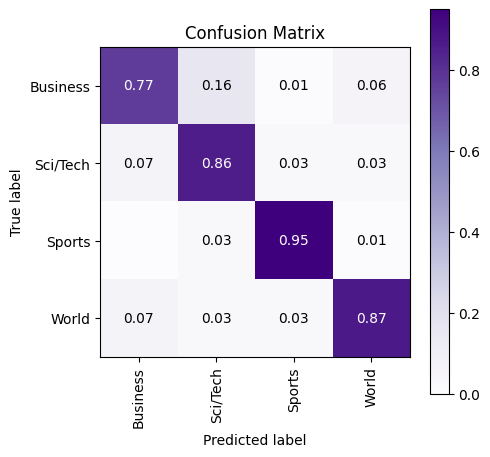

In [167]:


skplt.metrics.plot_confusion_matrix([target_classes[i] for i in Yactual], [target_classes[i] for i in Yhat],
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    hide_zeros=True,
                                    figsize=(5,5)
                                    );
plt.xticks(rotation=90);